Final Project Group 50

**Introduction**

In this project, we will be determining the best neighborhood in pittsburgh... for rats. This means that many things such as run down properties or health code violations, will be positive things to look for in our ideal neighborhood. Right from the start we decided to go with this metric, as it provides a unique and fun take on what is considered the "best neighborhood", we didn't even consider anything else. 

**The Metric**

Now, what qualifies a neighborhood to be more rat friendly than the others? We decided on 3 things: The amount/quality of condemned or dead-end properties in the area, the amount of pest code violations, and the amount of dog licenses in each neighborhood. Here are the links to the datasets that we are using:

- Condemned/Dead-end Properties: https://data.wprdc.org/dataset/condemned-properties/resource/0a963f26-eb4b-4325-bbbc-3ddf6a871410

- Health Code Violations: https://data.wprdc.org/dataset/allegheny-county-restaurant-food-facility-inspection-violations/resource/1a1329e2-418c-4bd3-af2c-cc334e7559af

- Dog Licenses in Area: https://data.wprdc.org/dataset/allegheny-county-dog-licenses/resource/ecedb5a4-4e9d-469b-8cde-2673ee48c482

We chose these metrics because they represent 3 very important aspects of life for a rat. First, rats need shelter to live in and be safe. An area with many trashy properties would provide plenty of shelter for the rats to live in. Second, rats need to be able to eat food and thrive. Therefore, analyzing the amount of pest related health code violations in the local restaurants will show us where rats can live to easily grab a bite to eat. Lastly, rats need to live safely. That's why we will also be taking the amount of dog licenses into account, so we can find the best neighborhood where rats won't have to worry about being snatched up or eaten when they let their guard down. Overall, our approach to find the best possible neighborhood for rats will be whichever neighborhood has the highest average ranking between our 3 important sub-metrics. Let's begin!



**Submetric 1: Shelter**

In order to figure out which neighborhood has the best places to live for rats, we will need to find a ratio between the amount of condemned/dead-end properties and the total inspection scores which rate the severity of the property's health violation.

To do that, we will find the average inspection score of the condemned properties in each neighborhood, but there is one thing we will need to take into account. Specifically, if we are going to use the average, we need to make sure that neighborhoods with few properties in general are removed from our list. This is because we can't decide that a neighborhood is the best just because it has 5 really bad properties in the whole area. The rats need places to live, and for that reason, any neighborhoods with less than 75 condemned properties are not eligible to be considered the best.

In [6]:
import pandas as pd
data = pd.read_csv('Condemned.tsv', delimiter='\t')
data['Zip Code'] = data['address'].str.extract(r'(\d{5})$')

total_scores = data.groupby('Zip Code')['latest_inspection_score'].sum()
property_count = data.groupby('Zip Code').size().sort_values(ascending=False)

zip_analysis = pd.DataFrame({
    'Total Score': total_scores,
    'Property Count': property_count
})

min_properties = 75
zip_analysis = zip_analysis[zip_analysis['Property Count'] >= min_properties]

zip_analysis['Average Score'] = zip_analysis['Total Score'] / zip_analysis['Property Count']

worst_zip = zip_analysis.sort_values(by='Average Score', ascending=False)
print(worst_zip)

          Total Score  Property Count  Average Score
Zip Code                                            
15210           866.0             537       1.612663
15219           437.0             283       1.544170
15224           124.0              82       1.512195
15214           291.0             204       1.426471
15212           555.0             411       1.350365
15208           372.0             291       1.278351
15206           303.0             250       1.212000
15207           224.0             199       1.125628
15221            90.0              80       1.125000
15220            85.0              83       1.024096
15204           131.0             134       0.977612


And here we have it. The top 11 neighborhoods with the best shelter for rats are as follows:

1. St. Clair 
2. Central Business District
3. Bloomfield
4. Perry North
5. Perry South
6. North Point Breeze
7. Larimer
8. Hazelwood
9. Wilkinsburgh
10. Elliot
11. Sheraden

The reason that we used the average inspection score as our submetric over other important metrics such as the total properties or the total inspection scores, is because a rat does not  have realtors telling them which available home is the best for them to live in. Therefore, under the assumption that a rat may choose a random condemned or dead-end property to live in, the most rat friendly neighborhood would be the one with the highest average inspection scores.

To conclude, the neighborhood with the best shelter options for a rat to live in, is St. Clair (15210). They have the highest average inspection score of 1.6, and they also have the most places to live in general, with 537 condemned or dead-end properties.

**Submetric 2: Places to eat**

To find out which neighborhood has the best eats for rats we're gonna have to take a look into which neighborhood has the most food facilities with pest related health code violations.

To do this we will have to filter data from all the food facilities in the greater Pittsburgh area. Thankfully there is a database containing every health code violation for every food facility in the greater Pittsburgh area. This will make the process easy for us, all we have to do is filter the data by pest related violations in the year 2024 then group by zip code. From there we can determine which zip code has the most facilities with pest related violations.


In [2]:
import pandas as pd
data = pd.read_csv("rats.csv")

#convert date column to datetime format to make ease
data['inspect_dt'] = pd.to_datetime(data['inspect_dt'])

#filter for pest management in 2024
filtered_data = data[(data['description_new'].str.contains('pest management', case=False, na=False)) & (data['inspect_dt'].dt.year == 2024)]

#group filtered data by zip code
zip_counts = filtered_data.groupby('zip')['facility_name'].nunique()

#find zip code with the highest count
max_zip_count = zip_counts.idxmax()
max_facility_count = zip_counts[max_zip_count]

print(f"The zip code with the most facilities with pest violations is {max_zip_count} with {max_facility_count} facilities.")

The zip code with the most facilities with pest violations is 15213.0 with 23 facilities.


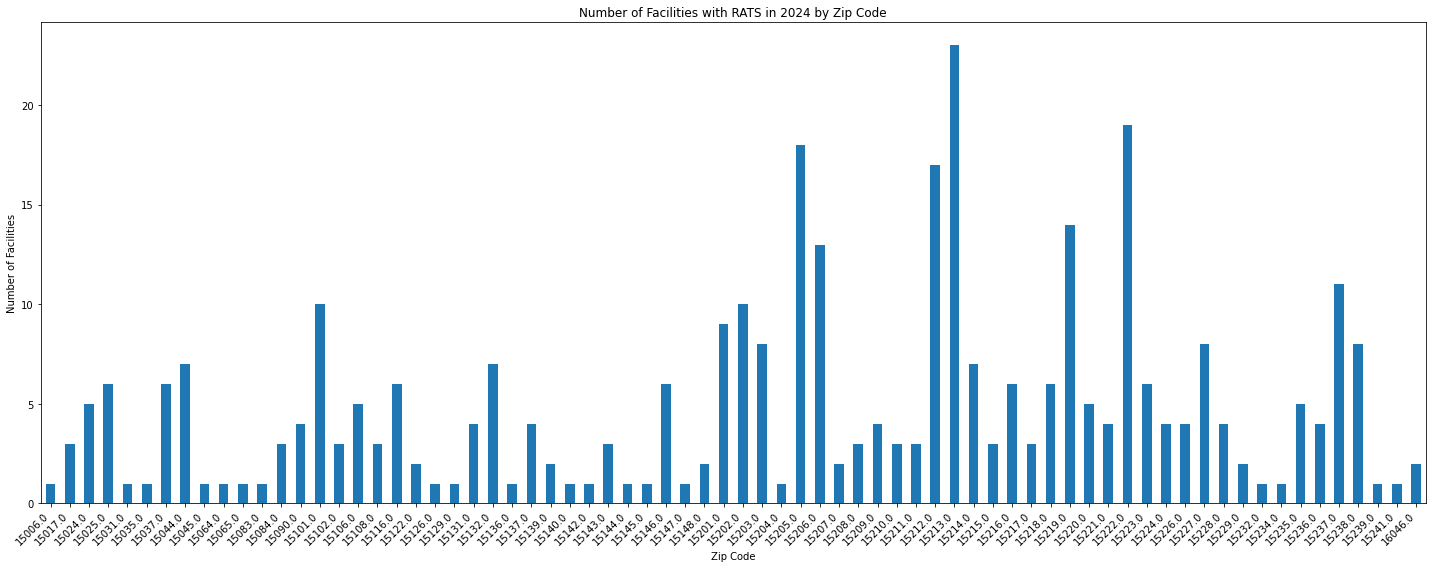

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("rats.csv")

#convert date column to datetime format to make easier
data['inspect_dt'] = pd.to_datetime(data['inspect_dt'])

#filter data by pest managment in 2024
filtered_data = data[(data['description_new'].str.contains('pest management', case=False, na=False)) & (data['inspect_dt'].dt.year == 2024)]

#group filtered by zip
zip_counts = filtered_data.groupby('zip')['facility_name'].nunique()

#plot
plt.figure(figsize=(20, 8))
zip_counts.plot(kind='bar')
plt.title('Number of Facilities with RATS in 2024 by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In conclusion we found that the neighbor hood with the most rats is oakland(15213) with 23 facilites with pest realted violations.

**Submetric 3: Safety**

Lastly, in order to find out which neighborhood is the safest for the rats, we will look at a dataset displaying how many dogs are registered in each neighborhood. We want to live in a place free from potential dangers, so we will filter out data to show a ranking of the places with the least amount of dogs, to the most. One issue with this dataset is that there are many neighborhoods far away from Pittsburgh, so we will also filter the results to only include zip codes of pittsburgh neighborhoods (zip codes starting with 152).

In [17]:
import pandas as pd

dog_licenses = pd.read_csv('dogs.tsv', sep='\t')

zipcode_dog_counts = dog_licenses['OwnerZip'].value_counts().reset_index()
zipcode_dog_counts.columns = ['ZipCode', 'NumberOfDogs']
zipcode_dog_counts_sorted = zipcode_dog_counts.sort_values(by='NumberOfDogs', ascending=False)

filtered_zipcodes = zipcode_dog_counts_sorted[zipcode_dog_counts_sorted['ZipCode'].astype(str).str.startswith('152')]
bottom_15_filtered_zipcodes = filtered_zipcodes.tail(15).sort_values(by='NumberOfDogs')

bottom_15_filtered_zipcodes_sorted = bottom_15_filtered_zipcodes.sort_values(by='NumberOfDogs', ascending=True).reset_index(drop=True)

bottom_15_filtered_zipcodes_sorted

,ZipCode,NumberOfDogs
0,15275,2
1,15224,3
2,15222,4
3,15232,4
4,15219,4
5,15201,4
6,15208,5
7,15213,6
8,15217,7
9,15203,7


Here we can see that there are many suitable places for the rats to relax and live in peace knowing that they wont have to worry about dogs if they choose to live in this area. Looking at our ranking, we have one zipcode in the pittsburgh area which is our winner for the most rat safe neighborhood: Coraopolis Hieghts with only 2 regestered dog liscenses. 

**The Best Neighborhood**

Now, we have all 3 of our submetrics displayed. We have the safest places, the places with the best housing options, and the places with the most available food. We will now combine these 3 metrics to find our true ranking of which neighborhoods are the best ones to live in as a rat.

We will do this by taking our 3 submetric's rankings and then finding which zip codes have the highest average ranking between the 3 metrics. This new ranking will display which neighborhood has the highest balance between all 3 of our important values for a rat, as a neighborhood full of one sub metric will not be good if it is lacking in the other areas. To ensure a fair average ranking, we will be excluding any zipcodes that arent present in all 3 rankings.

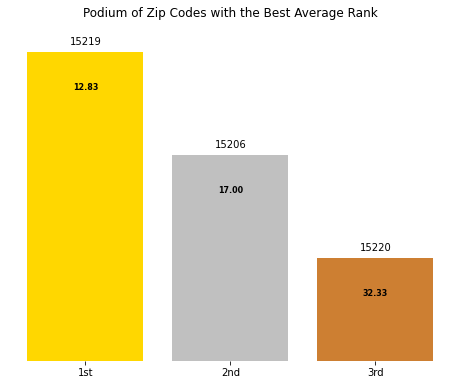

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and prep 'Condemned' dataset
condemned_data = pd.read_csv('Condemned.tsv', delimiter='\t')
condemned_data['Zip Code'] = condemned_data['address'].str.extract(r'(\d{5})$')
total_scores = condemned_data.groupby('Zip Code')['latest_inspection_score'].sum()
property_count = condemned_data.groupby('Zip Code').size()
zip_analysis = pd.DataFrame({
    'Total Score': total_scores,
    'Property Count': property_count
})
zip_analysis['Average Score'] = zip_analysis['Total Score'] / zip_analysis['Property Count']
zip_analysis = zip_analysis[zip_analysis['Property Count'] >= 75]
zip_analysis['Rank1'] = zip_analysis['Average Score'].rank(ascending=True)

# Load and prep 'rats.csv' dataset
rats_data = pd.read_csv("rats.csv")
rats_data['inspect_dt'] = pd.to_datetime(rats_data['inspect_dt'])
filtered_rats_data = rats_data[(rats_data['description_new'].str.contains('pest management', case=False, na=False)) &
                               (rats_data['inspect_dt'].dt.year == 2024)]
zip_counts = filtered_rats_data.groupby('zip')['facility_name'].nunique()
zip_analysis_2 = pd.DataFrame({'Facility Count': zip_counts})
zip_analysis_2['Rank2'] = zip_analysis_2['Facility Count'].rank(ascending=False)

# Load and prep 'dogs.tsv' dataset
dogs_data = pd.read_csv('dogs.tsv', sep='\t')
zipcode_dog_counts = dogs_data['OwnerZip'].value_counts().reset_index()
zipcode_dog_counts.columns = ['ZipCode', 'NumberOfDogs']
zipcode_dog_counts['Rank3'] = zipcode_dog_counts['NumberOfDogs'].rank(ascending=True)
filtered_zipcode_dog_counts = zipcode_dog_counts[zipcode_dog_counts['ZipCode'].astype(str).str.startswith('152')].copy()
filtered_zipcode_dog_counts.loc[:, 'ZipCode'] = filtered_zipcode_dog_counts['ZipCode'].astype(str)

# Now we will merge the rankings and calculate the average rank
zip_analysis.index = zip_analysis.index.map(str)
zip_analysis_2.index = zip_analysis_2.index.map(str)
combined_ranks = zip_analysis[['Rank1']].join(zip_analysis_2[['Rank2']], how='inner', rsuffix='_rats')
combined_ranks = combined_ranks.join(filtered_zipcode_dog_counts.set_index('ZipCode')[['Rank3']], how='inner')
combined_ranks['Average Rank'] = combined_ranks[['Rank1', 'Rank2', 'Rank3']].mean(axis=1)
final_ranking = combined_ranks.sort_values(by='Average Rank')

# Visualization time 
podium_data = final_ranking.head(3)

podium_heights = [3, 2, 1]

colors = ['#ffd700', '#c0c0c0', '#cd7f32']  # Gold, Silver, Bronze
fig, ax = plt.subplots(figsize=(8, 6))

for i, (zipcode, row) in enumerate(podium_data.iterrows()):
    ax.bar(i, podium_heights[i], color=colors[i])
    ax.text(i, podium_heights[i] - 0.3, f"{row['Average Rank']:.2f}", 
            ha='center', va='top', color='black', fontsize=8, fontweight='bold')
    ax.text(i, podium_heights[i] + 0.05, zipcode, 
            ha='center', va='bottom', color='black', fontsize=10)

ax.set_xticks(range(len(podium_data)))
ax.set_xticklabels(['1st', '2nd', '3rd'])
ax.set_title('Podium of Zip Codes with the Best Average Rank', pad=20)
ax.set_yticks([])

for spine in ax.spines.values():
    spine.set_visible(False)

plt.subplots_adjust(top=0.9, bottom=0.15)
plt.show()

Now, with the best average ranking across our 3 submetrics, The Central Business District is our winner for the best neighborhood in Pittsburgh for rats!


**Conclusion - Quinn**

In conclusion it is no surprise that the heart of the city would be the best for rats. Downtown areas are usually crowded and full of trash due to the high volumes of people and businesses in the area. There are tons of places to live as a rat and plenty of food from all of the thrown out trash and restaurants that seem to have lots of pest related health code violations, and finally there is plenty of safety in the downtown area with minimal dogs due to how most dog owners live in more suburban areas. Overall, if you are a rat looking to settle down in the Pittsburgh area, the downtown Central Business District is the place for you.

## Conclusion - Adam 

To conclude I think it is only fit that the heart of pittsburgh (the central buisness district) is the best for rats. I perosonally thought that the best place for rats overall would be oakland(my favorite neighborhood) due to personal rat encounters. But it makes sense that the middle of the city would provide a suitable home for rats. Not only does it just make sense our data proves that the central buisness district is the best for rats by providing the perfect balance of shelter, food, and saftey. With this data as evidence we can comfortably declare the middle of pittsburgh as the most livable city...for rats.